In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
from scipy import stats
from scipy.stats import norm

In [44]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option('display.max_colwidth', None)

In [45]:
file = 'Research-Radboud-University/The Use of Generative AI in Legal Education(1-38).xlsx'
df = pd.read_excel(file)
df_all = pd.read_excel(file)

df = df.drop([13, 30]) #asia and africa grappenmakers

df.columns = df.columns.str.strip().str.replace('\n', '')

df.rename(columns={
    'Start time': 'start_time',
    'Completion time': 'completion_time',
    'Email': 'email',
    'Name': 'name',
    'Last modified time': 'last_modified_time',
    'In which continent do you study currently? Or did you last study?': 'continent',
    "What is your year of study in law school? (If you're not studying anymore, please fill in the last year of study you've completed)": "year_of_study",
    'What is your primary focus in legal studies? (Select all that apply)': 'primary_focus',
    'For what purposes do/did you use Generative AI tools in your studies? (Select all that apply)': 'ai_purpose',
    'How has using GenAI affected your critical thinking skills (applying it to legal problems)?': 'critical_thinking_impact',
    'Do you rely less on traditional resources (e.g., textbooks, journals) after adopting AI tools?': 'reliance_on_traditional_resources',
    'Do you feel AI tools foster dependency, hindering skill development?': 'ai_dependency_perception',
    'How much does/did a Generative AI tool assist you in your studies?': 'ai_assistance_level',
    'How would you rate the accuracy of the information provided by GenAI tools?': 'genai_accuracy_rating',
    'How do you currently feel about Generative AI and its impact on education?': 'genai_impact_rating',
    'In your opinion, what are the biggest advantages of using Generative AI in legal education?': 'genai_advantages',
    'What challenges or drawbacks have you experienced when using Generative AI tools in your studies?': 'genai_drawbacks'
}, inplace=True)

# Rename the columns
df_all.rename(columns={
    'Start time': 'start_time',
    'Completion time': 'completion_time',
    'Email': 'email',
    'Name': 'name',
    'Last modified time': 'last_modified_time',
    'In which continent do you study currently? Or did you last study?': 'continent',
    "What is your year of study in law school? (If you're not studying anymore, please fill in the last year of study you've completed)": "year_of_study",
    'What is your primary focus in legal studies? (Select all that apply)': 'primary_focus',
    'For what purposes do/did you use Generative AI tools in your studies? (Select all that apply)': 'ai_purpose',
    'How has using GenAI affected your critical thinking skills (applying it to legal problems)?': 'critical_thinking_impact',
    'Do you rely less on traditional resources (e.g., textbooks, journals) after adopting AI tools?': 'reliance_on_traditional_resources',
    'Do you feel AI tools foster dependency, hindering skill development?': 'ai_dependency_perception',
    'How much does/did a Generative AI tool assist you in your studies?': 'ai_assistance_level',
    'How would you rate the accuracy of the information provided by GenAI tools?': 'genai_accuracy_rating',
    'How do you currently feel about Generative AI and its impact on education?': 'genai_impact_rating',
    'In your opinion, what are the biggest advantages of using Generative AI in legal education?': 'genai_advantages',
    'What challenges or drawbacks have you experienced when using Generative AI tools in your studies?': 'genai_drawbacks'
}, inplace=True)

df.head()

,b,Begintijd,Tijd van voltooien,E-mail,Naam,Language,continent,year_of_study,primary_focus,ai_usage_frequency,ai_purpose,current_grade,critical_thinking_impact,reliance_on_traditional_resources,ai_dependency_perception,ai_assistance_level,genai_accuracy_rating,genai_impact_rating,genai_advantages,genai_drawbacks
0,1,2024-11-30 17:22:52,2024-11-30 17:24:13,anonymous,NaN,NaN,Europe,Bachelor's - Third year,Intellectual law;,Monthly,Self-studying;Assignments/case studies;,7,Didn't affect me,Yes,Possibly,4,4,5,NaN,NaN
1,2,2024-11-30 17:39:42,2024-11-30 17:42:54,anonymous,NaN,NaN,Europe,Bachelor's - Second year,International law;Human rights law;,Weekly,Assignments/case studies;Homework;,6,Positively,No,No,4,5,5,I use it for papers etc. I don’t depend on AI but it’s a great tool to get ideas from.,"Something AI give the wrong information, so you don’t must to depend on it."
2,3,2024-11-30 18:50:44,2024-11-30 20:09:33,anonymous,NaN,NaN,Europe,(Applied) Bachelor's - Fourth year,(Applied) Bachelor's - Fourth year,Weekly,Assignments/case studies;,7,I think I got more lazy.,Possibly,Possibly,3,4,5,"It is a quick way to get fast answers, someone who can read and approve/correct your work in seconds. \nAnd in stead of memorize laws and browse through your book of laws, you cask AI and get them in seconds.","Mmm well, sometimes its not accurate, or it makes things up. Like sources that don’t actually exist."
3,4,2024-11-30 17:39:42,2024-11-30 21:31:58,anonymous,NaN,NaN,Europe,Bachelor's - Third year,Human rights law;Corporate law;Environmental law;Intellectual law;Health law;Tax law;International law,Weekly,Self-studying;Assignments/case studies;Preparing for exams,8,Positively,No,No,7,7,7,-,-
4,5,2024-12-01 12:30:29,2024-12-01 12:31:39,anonymous,NaN,NaN,Europe,Bachelor's - Second year,International law;Human rights law;Corporate law;Health law;Criminal law;Tax law,Weekly,Assignments/case studies;Preparing for exams;Self-studying,7,Didn't affect me,Yes,Yes,6,7,7,It helps you find sources more quickly,It makes you lazy


In [46]:
df.dtypes

b                                             int64
Begintijd                            datetime64[ns]
Tijd van voltooien                   datetime64[ns]
E-mail                                       object
Naam                                        float64
Language                                    float64
continent                                    object
year_of_study                                object
primary_focus                                object
ai_usage_frequency                           object
ai_purpose                                   object
current_grade                                 int64
critical_thinking_impact                     object
reliance_on_traditional_resources            object
ai_dependency_perception                     object
ai_assistance_level                           int64
genai_accuracy_rating                         int64
genai_impact_rating                           int64
genai_advantages                             object
genai_drawba

# Continent data analysis

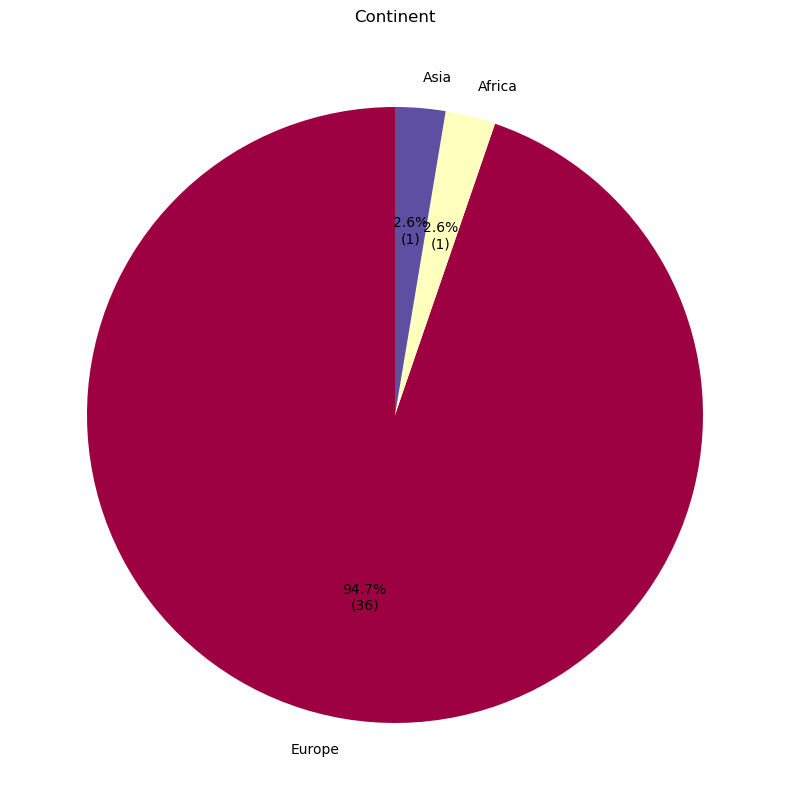

In [47]:
def autopct_format(pct, all_vals):
    total = sum(all_vals)
    val = int(round(pct * total / 100.0))
    return f"{pct:.1f}%\n({val})"

plt.figure(figsize=(10, 10))
values = df_all['continent'].value_counts()
values.plot.pie(
    autopct=lambda pct: autopct_format(pct, values), 
    startangle=90, 
    cmap='Spectral', 
    labels=values.index
)
plt.title('Continent')
plt.ylabel('')
plt.show()


In [48]:
pd.DataFrame(df_all['continent'].value_counts())

,count
continent,
Europe,36
Africa,1
Asia,1


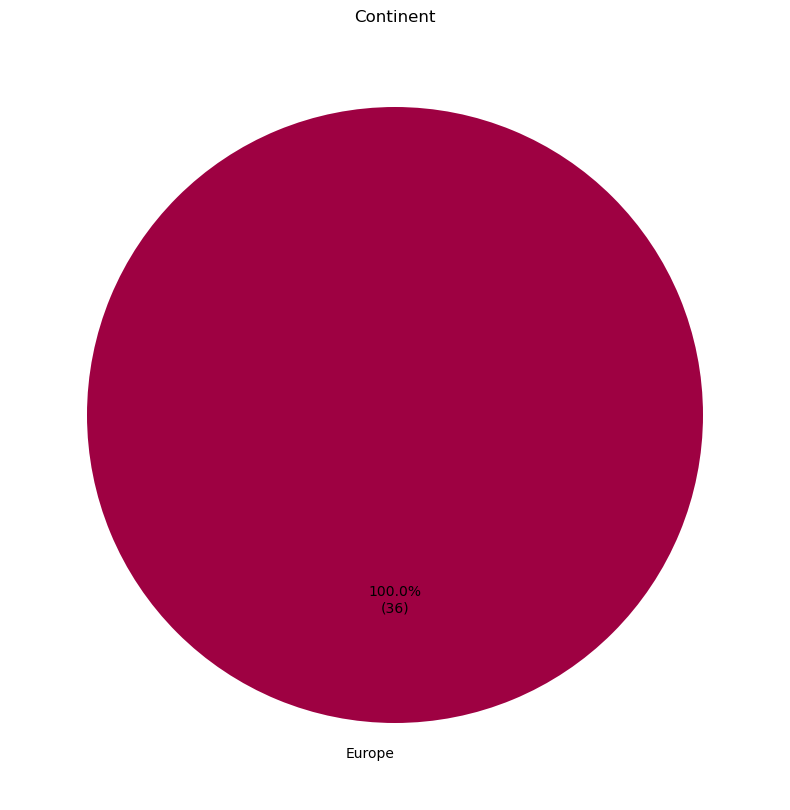

In [49]:
def autopct_format(pct, all_vals):
    total = sum(all_vals)
    val = int(round(pct * total / 100.0))
    return f"{pct:.1f}%\n({val})"

plt.figure(figsize=(10, 10))
values = df['continent'].value_counts()
values.plot.pie(
    autopct=lambda pct: autopct_format(pct, values), 
    startangle=90, 
    cmap='Spectral', 
    labels=values.index
)
plt.title('Continent')
plt.ylabel('')
plt.show()


In [50]:
pd.DataFrame(df['continent'].value_counts())

,count
continent,
Europe,36


# year of study

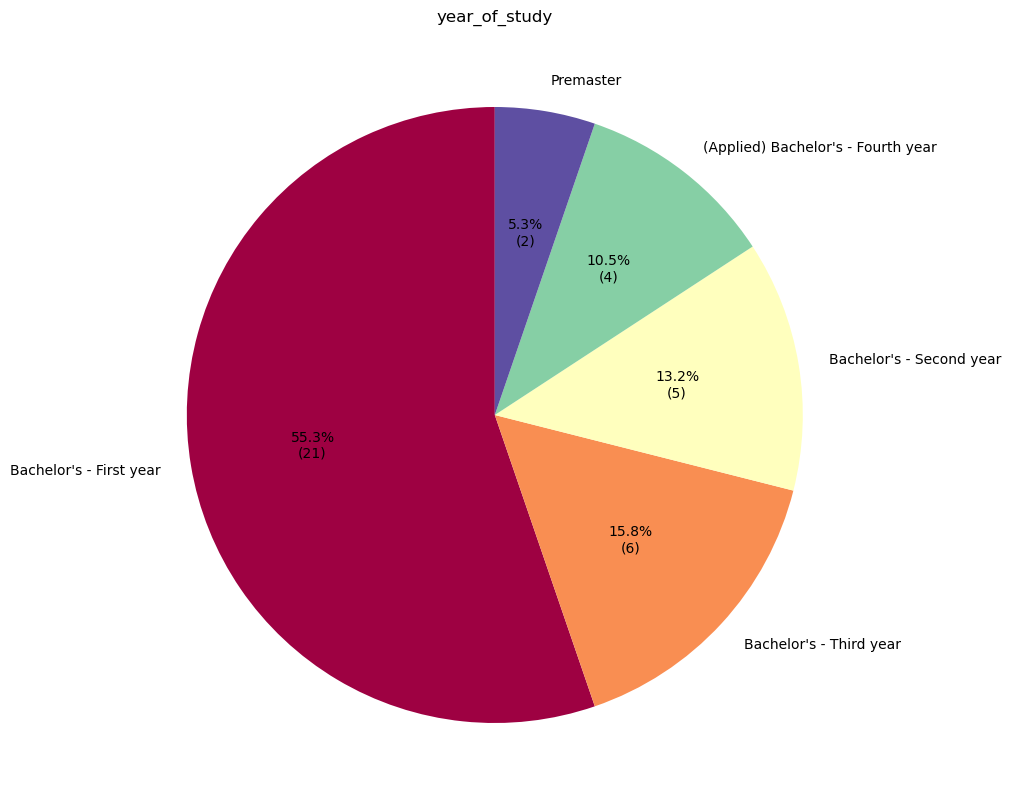

In [51]:
# Custom autopct function to display both percentage and absolute values
def autopct_format(pct, all_vals):
    total = sum(all_vals)
    val = int(round(pct * total / 100.0))
    return f"{pct:.1f}%\n({val})"

# Create the pie chart
plt.figure(figsize=(10, 10))
values = df_all['year_of_study'].value_counts()
values.plot.pie(
    autopct=lambda pct: autopct_format(pct, values), 
    startangle=90, 
    cmap='Spectral', 
    labels=values.index
)
plt.title('year_of_study')
plt.ylabel('')
plt.show()


# specific law field

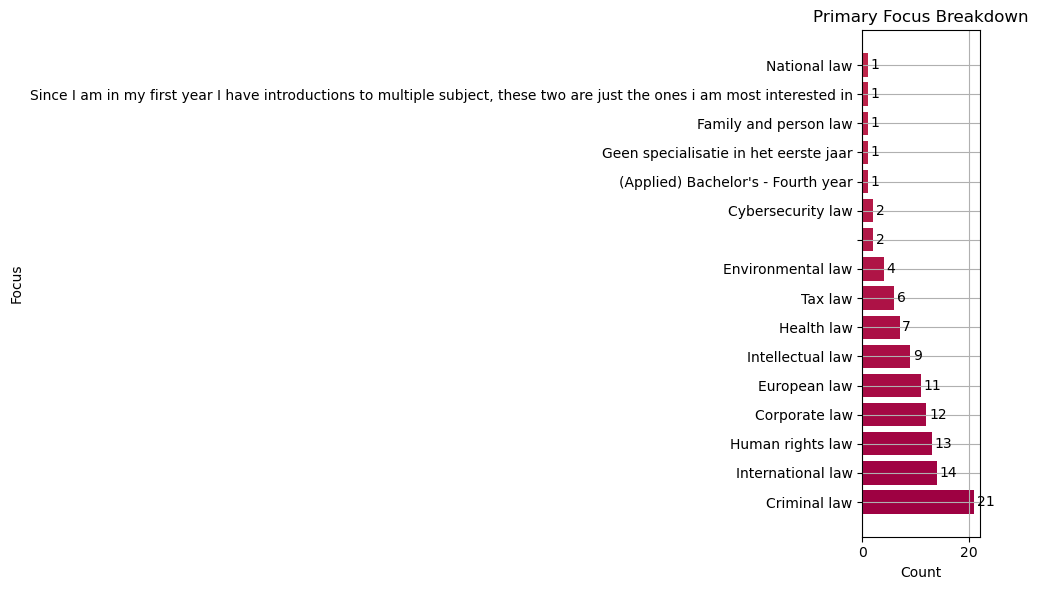

In [52]:

split_values = df['primary_focus'].dropna().str.split(';')
flat_list = [item.strip() for sublist in split_values for item in sublist]
value_counts = Counter(flat_list)

value_counts_df = pd.DataFrame(value_counts.items(), columns=['Focus', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.barh(value_counts_df['Focus'], value_counts_df['Count'], color=plt.cm.Spectral(range(len(value_counts_df))))

for bar in bars:
    plt.text(
        bar.get_width() + 0.5,  
        bar.get_y() + bar.get_height() / 2, 
        str(int(bar.get_width())),  
        va='center'  
    )

plt.title('Primary Focus Breakdown')
plt.xlabel('Count')
plt.ylabel('Focus')
plt.grid(True)
plt.tight_layout()
plt.show()


In [53]:
value_counts_df

,Focus,Count
9,Criminal law,21
2,International law,14
3,Human rights law,13
5,Corporate law,12
10,European law,11
0,Intellectual law,9
7,Health law,7
8,Tax law,6
6,Environmental law,4
1,,2


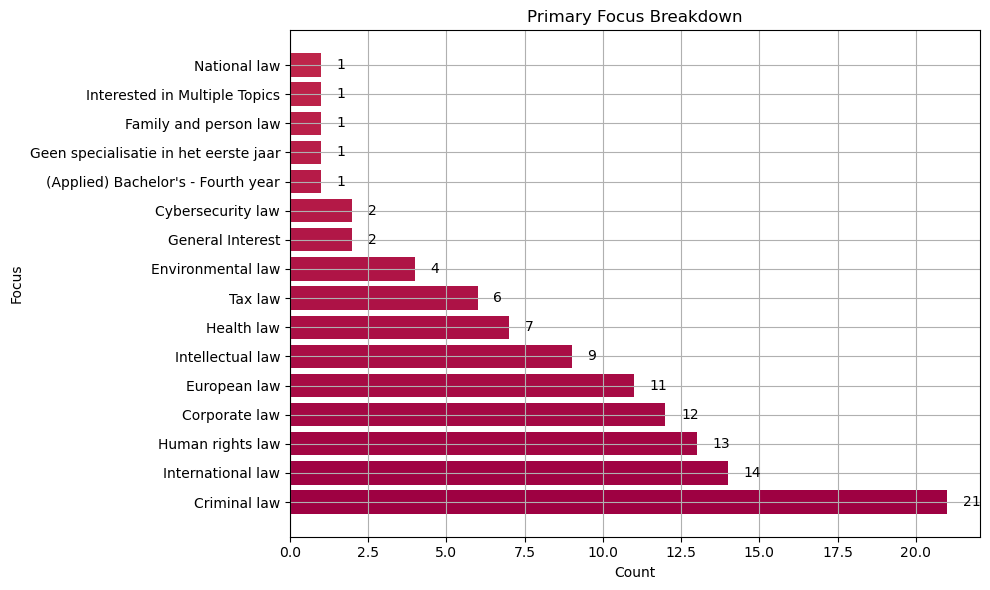

In [54]:

indices_to_shorten = [1, 14]  
shortened_labels = {
    1: "General Interest",
    14: "Interested in Multiple Topics"
}

for index in indices_to_shorten:
    if index in value_counts_df.index:
        value_counts_df.loc[index, 'Focus'] = shortened_labels[index]

plt.figure(figsize=(10, 6))
bars = plt.barh(value_counts_df['Focus'], value_counts_df['Count'], color=plt.cm.Spectral(range(len(value_counts_df))))


for bar in bars:
    plt.text(
        bar.get_width() + 0.5, 
        bar.get_y() + bar.get_height() / 2,  
        str(int(bar.get_width())),  
        va='center'  
    )

plt.title('Primary Focus Breakdown')
plt.xlabel('Count')
plt.ylabel('Focus')
plt.grid(True)
plt.tight_layout()
plt.show()


# AI usage frequency

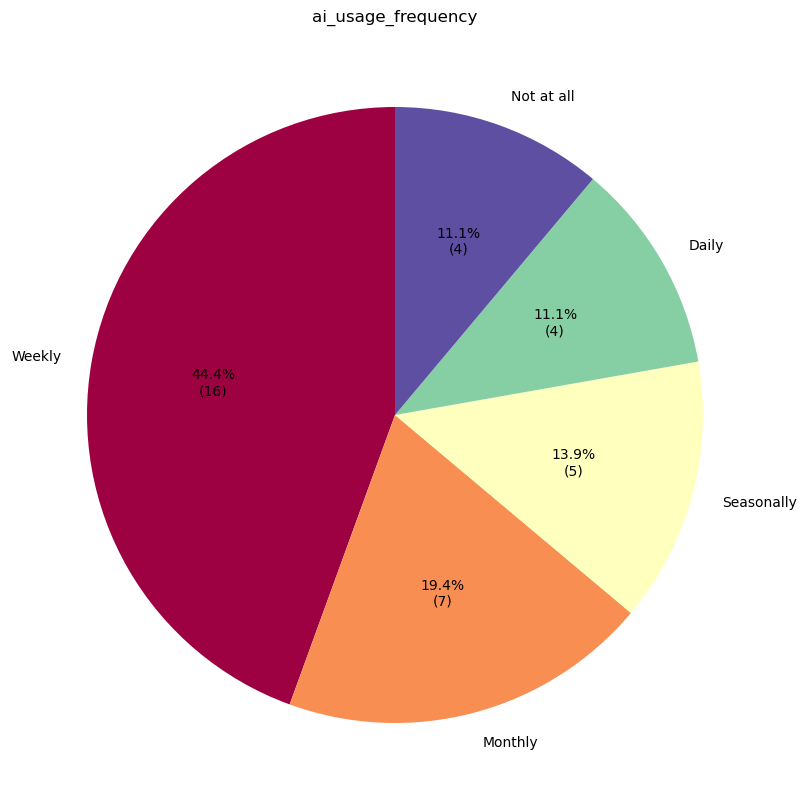

In [55]:
def autopct_format(pct, all_vals):
    total = sum(all_vals)
    val = int(round(pct * total / 100.0))
    return f"{pct:.1f}%\n({val})"

plt.figure(figsize=(10, 10))
values = df['ai_usage_frequency'].value_counts()
values.plot.pie(
    autopct=lambda pct: autopct_format(pct, values), 
    startangle=90, 
    cmap='Spectral', 
    labels=values.index
)
plt.title('ai_usage_frequency')
plt.ylabel('')
plt.show()


# critical thinking impact

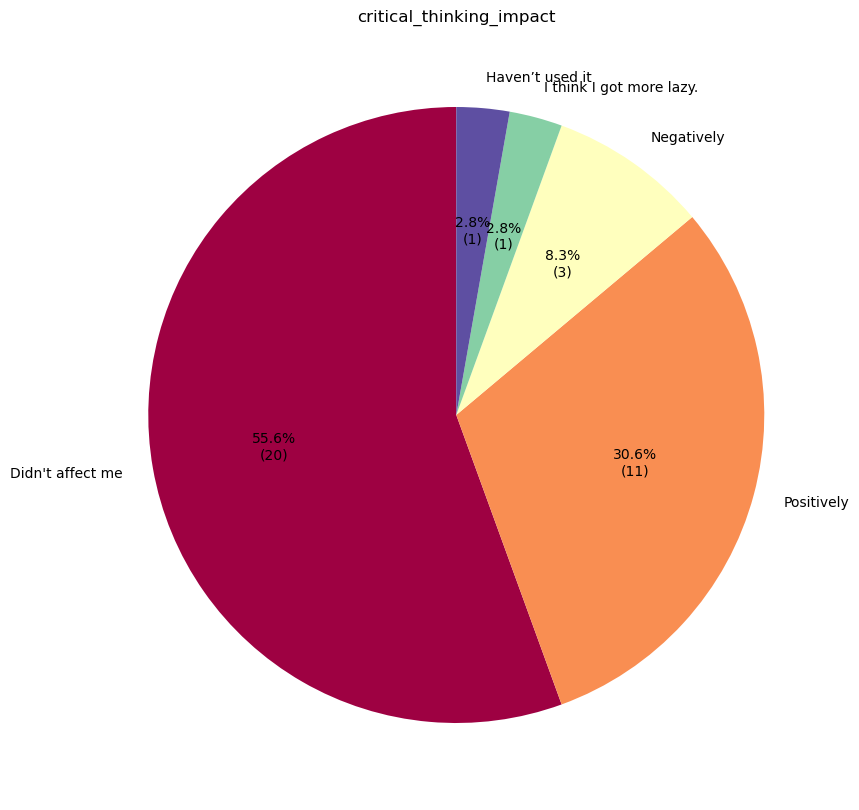

In [56]:
def autopct_format(pct, all_vals):
    total = sum(all_vals)
    val = int(round(pct * total / 100.0))
    return f"{pct:.1f}%\n({val})"

plt.figure(figsize=(10, 10))
values = df['critical_thinking_impact'].value_counts()
values.plot.pie(
    autopct=lambda pct: autopct_format(pct, values), 
    startangle=90, 
    cmap='Spectral', 
    labels=values.index
)
plt.title('critical_thinking_impact')
plt.ylabel('')
plt.show()


# histplot ai assistance level

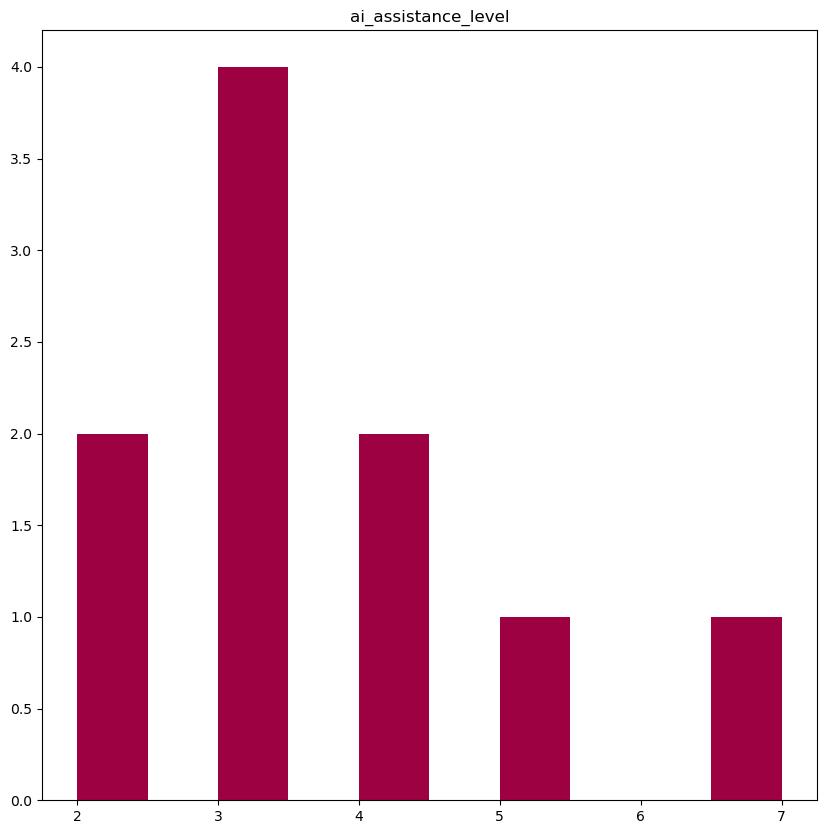

In [57]:
def autopct_format(pct, all_vals):
    total = sum(all_vals)
    val = int(round(pct * total / 100.0))
    return f"{pct:.1f}%\n({val})"

plt.figure(figsize=(10, 10))
values = df['ai_assistance_level'].value_counts()
values.plot.hist(
    cmap='Spectral', 
)
plt.title('ai_assistance_level')
plt.ylabel('')
plt.show()


# boxplot AI assisntance level

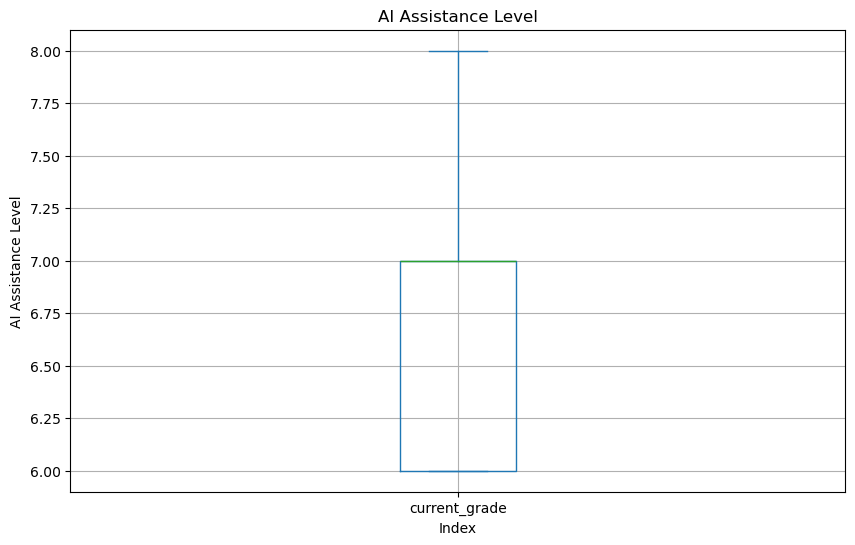

In [58]:
plt.figure(figsize=(10, 6))
df['current_grade'].plot.box()
plt.title('AI Assistance Level')
plt.xlabel('Index')
plt.ylabel('AI Assistance Level')
plt.grid(True)
plt.show()

# bootstrap attempt 1: ai assistance level

In [59]:
print(df['current_grade'].mean().round(1))
print(df['current_grade'].min())
print(df['current_grade'].max())



6.9
6
8


In [60]:
df['ai_assistance_level'].median()

5.0

Skewness 1.910116593464931
Kurtosis 3.9176914757250483


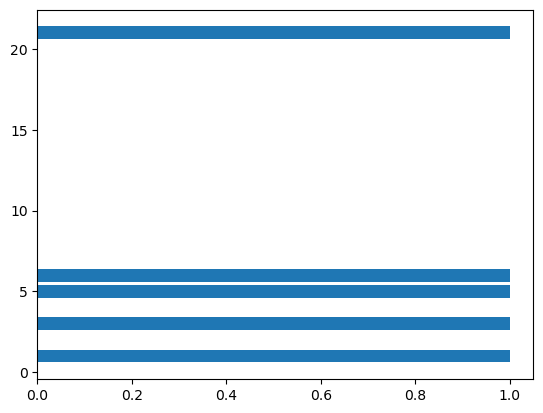

<Figure size 640x480 with 0 Axes>

In [61]:
#histogram and normal probability plot
year_count = df['year_of_study'].value_counts()
plt.barh(year_count, width=1)
fig = plt.figure()
#skewness and kurtsosis
print("Skewness", year_count.skew())
print("Kurtosis", year_count.kurt())

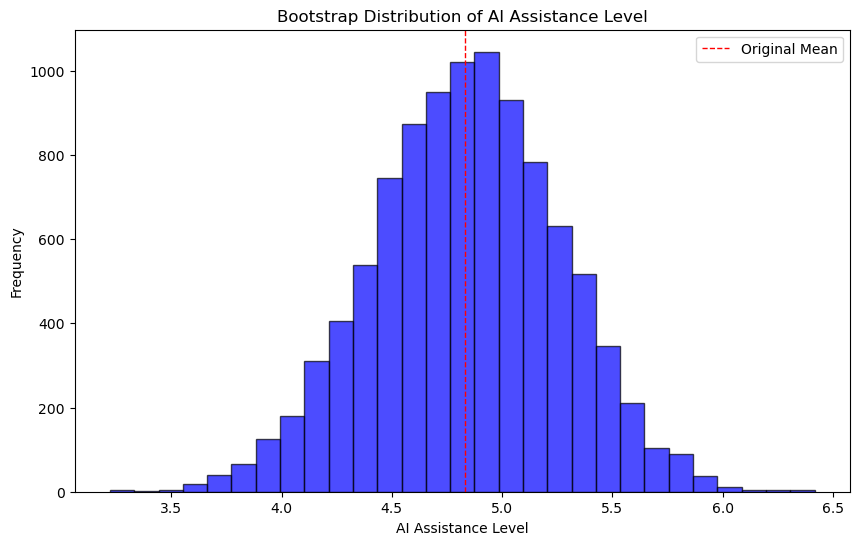

In [62]:
bootstrap_samples = 10000
means = []  

for _ in range(bootstrap_samples):
    sample = df['ai_assistance_level'].sample(frac=1, replace=True)
    means.append(sample.mean()) 

bins = np.linspace(min(means), max(means), 30)
hist, edges = np.histogram(means, bins=bins) 

plt.figure(figsize=(10, 6))
plt.bar(edges[:-1], hist, width=np.diff(edges), alpha=0.7, color='blue', edgecolor='black', align='edge')
plt.axvline(df['ai_assistance_level'].mean(), color='red', linestyle='dashed', linewidth=1, label='Original Mean')
plt.title('Bootstrap Distribution of AI Assistance Level')
plt.xlabel('AI Assistance Level')
plt.ylabel('Frequency')
plt.legend()
plt.show()


## mapping ai usage frequency

In [63]:
mapping = {
    'Not at all': 0,
    'Monthly': 1,
    'Weekly': 2,
    'Daily': 3,
    'Seasonally': 4
}
df['ai_usage_frequency_numeric'] = df['ai_usage_frequency'].map(mapping)

mean_usage = df.groupby('current_grade')['ai_usage_frequency_numeric'].median()
print(mean_usage)

current_grade
6    2.0
7    2.0
8    1.5
Name: ai_usage_frequency_numeric, dtype: float64


# bootstrap samples current grade

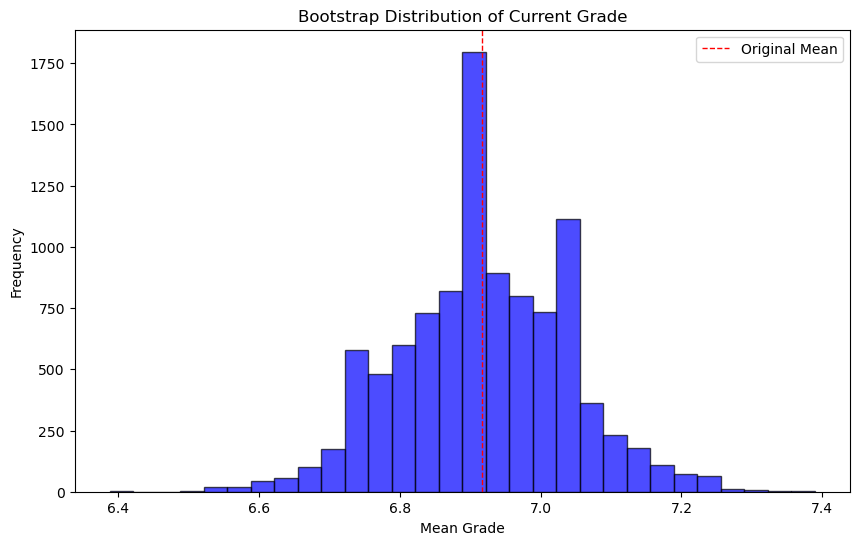

In [64]:
bootstrap_samples = 10000
means = []  

for _ in range(bootstrap_samples):
    sample = df['current_grade'].sample(frac=1, replace=True)  
    means.append(sample.mean())  

plt.figure(figsize=(10, 6))
plt.hist(means, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(df['current_grade'].mean(), color='red', linestyle='dashed', linewidth=1, label='Original Mean')
plt.title('Bootstrap Distribution of Current Grade')
plt.xlabel('Mean Grade')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# bootstrap samples current grade and ai usage frquency 

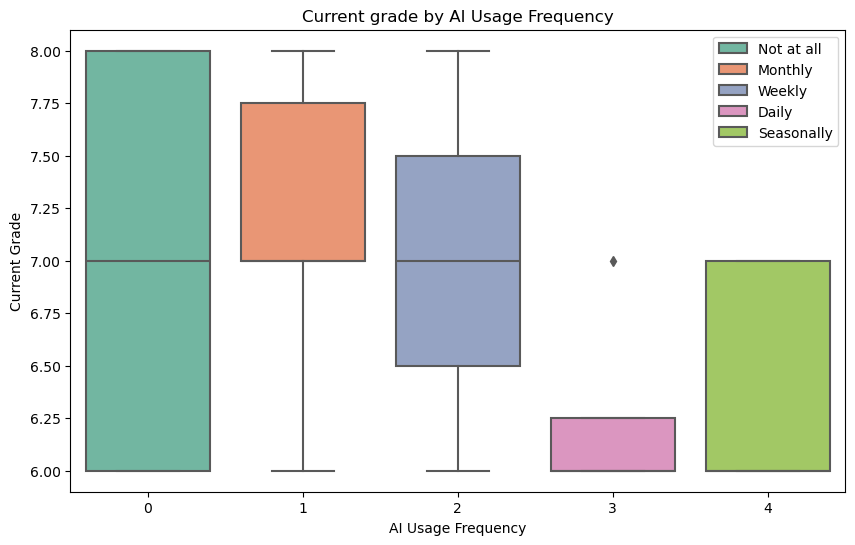

In [65]:
bootstrap_samples = 1000  
means_boxplot = []  

for _ in range(bootstrap_samples):
    sample = df[['current_grade', 'ai_usage_frequency_numeric']].sample(frac=1, replace=True)
    means.append(sample.mean())  

mapping = {
    'Not at all': 0,
    'Monthly': 1,
    'Weekly': 2,
    'Daily': 3,
    'Seasonally': 4
}

plt.figure(figsize=(10, 6))
sns.boxplot(x='ai_usage_frequency_numeric', y='current_grade', data=sample, palette='Set2')
plt.title('Current grade by AI Usage Frequency')
plt.xlabel('AI Usage Frequency')
plt.ylabel('Current Grade')
plt.legend(mapping)
plt.show()


# bootstrap samples current grade and ai_assistance_level

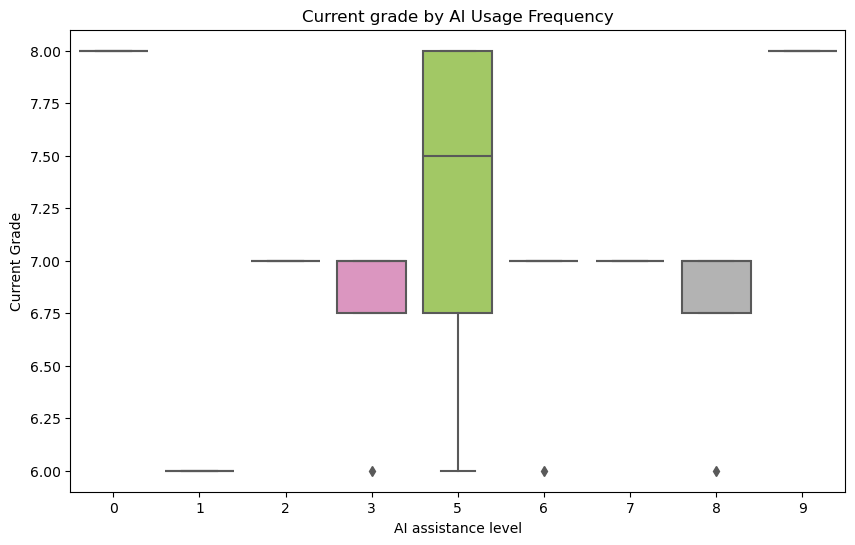

In [66]:
bootstrap_samples = 1000  
means_boxplot = []  

for _ in range(bootstrap_samples):
    sample = df[['current_grade', 'ai_assistance_level']].sample(frac=1, replace=True)
    means.append(sample.mean())  

plt.figure(figsize=(10, 6))
sns.boxplot(x='ai_assistance_level', y='current_grade', data=sample, palette='Set2')
plt.title('Current grade by AI Usage Frequency')
plt.xlabel('AI assistance level')
plt.ylabel('Current Grade')
plt.show()


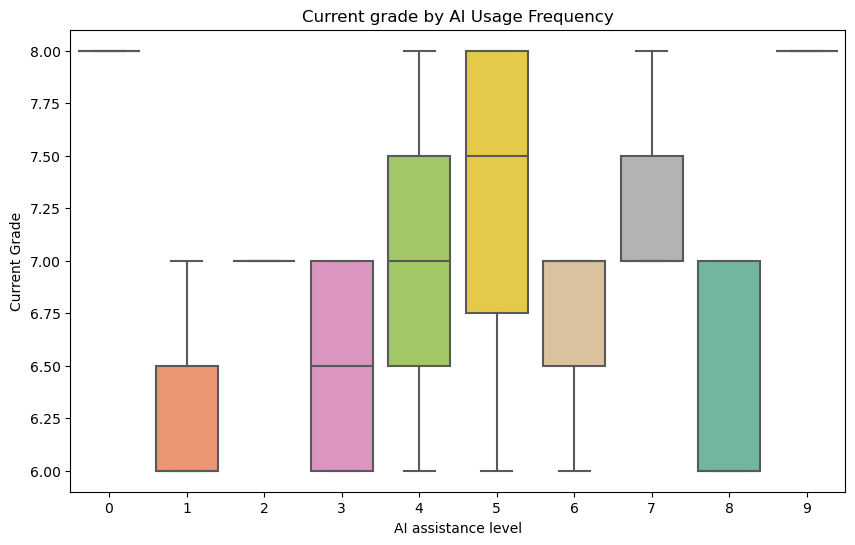

In [67]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ai_assistance_level', y='current_grade', data=df, palette='Set2')
plt.title('Current grade by AI Usage Frequency')
plt.xlabel('AI assistance level')
plt.ylabel('Current Grade')
plt.show()

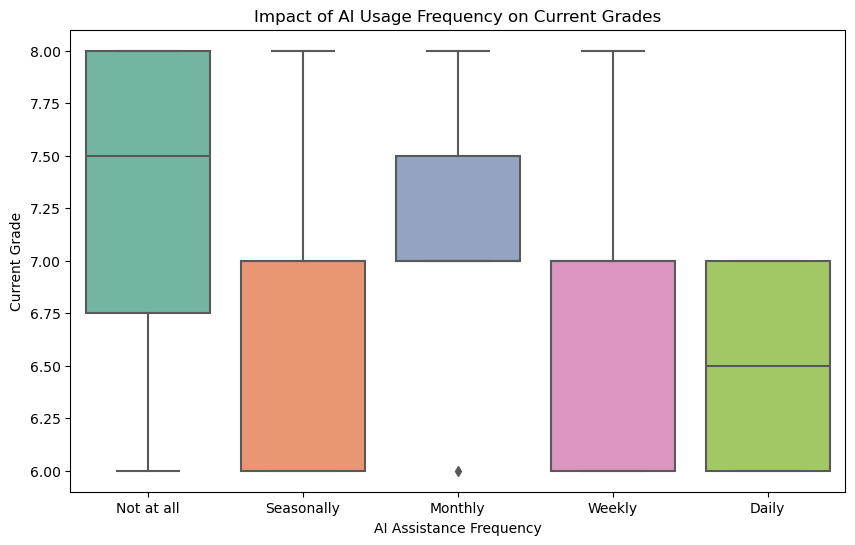

In [68]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ai_usage_frequency', y='current_grade', data=df, palette='Set2', order=['Not at all', 'Seasonally', 'Monthly', 'Weekly', 'Daily']  # Specify the desired order here
)
plt.title('Impact of AI Usage Frequency on Current Grades')
plt.xlabel('AI Assistance Frequency')
plt.ylabel('Current Grade')

plt.show()

In [69]:
df.columns

Index(['b', 'Begintijd', 'Tijd van voltooien', 'E-mail', 'Naam', 'Language',
       'continent', 'year_of_study', 'primary_focus', 'ai_usage_frequency',
       'ai_purpose', 'current_grade', 'critical_thinking_impact',
       'reliance_on_traditional_resources', 'ai_dependency_perception',
       'ai_assistance_level', 'genai_accuracy_rating', 'genai_impact_rating',
       'genai_advantages', 'genai_drawbacks', 'ai_usage_frequency_numeric'],
      dtype='object')

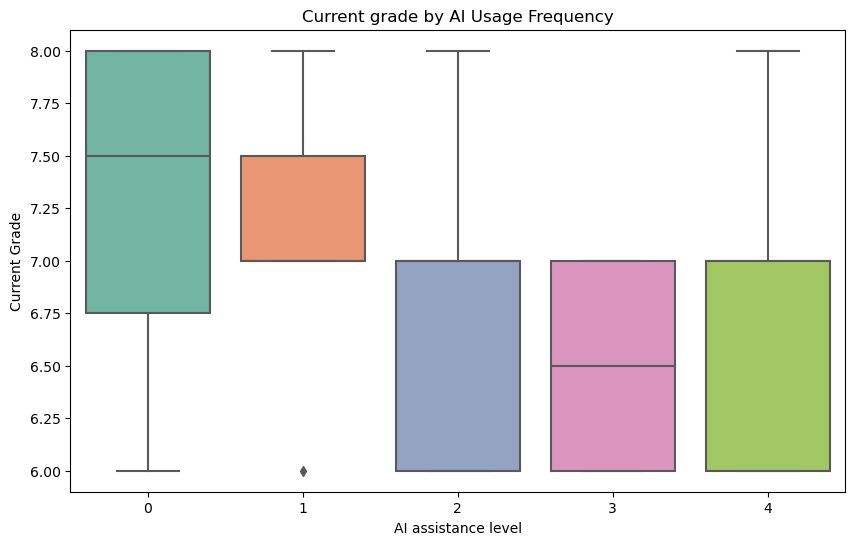

In [70]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ai_usage_frequency_numeric', y='current_grade', data=df, palette='Set2')
plt.title('Current grade by AI Usage Frequency')
plt.xlabel('AI assistance level')
plt.ylabel('Current Grade')
plt.show()

```
mapping = {
    'Not at all': 0,
    'Monthly': 1,
    'Weekly': 2,
    'Daily': 3,
    'Seasonally': 4
}

Statistics for Current Grade by AI Usage Frequency Groups:
usage_group              
Group 0-1    Q1 (25%)        6.7500
             Median (50%)    7.0000
             Q3 (75%)        8.0000
             IQR             1.2500
             Min             6.0000
             Max             8.0000
             Mean            7.0625
Group 2-4    Q1 (25%)        6.0000
             Median (50%)    7.0000
             Q3 (75%)        7.0000
             IQR             1.0000
             Min             6.0000
             Max             8.0000
             Mean            6.8000
Name: current_grade, dtype: float64


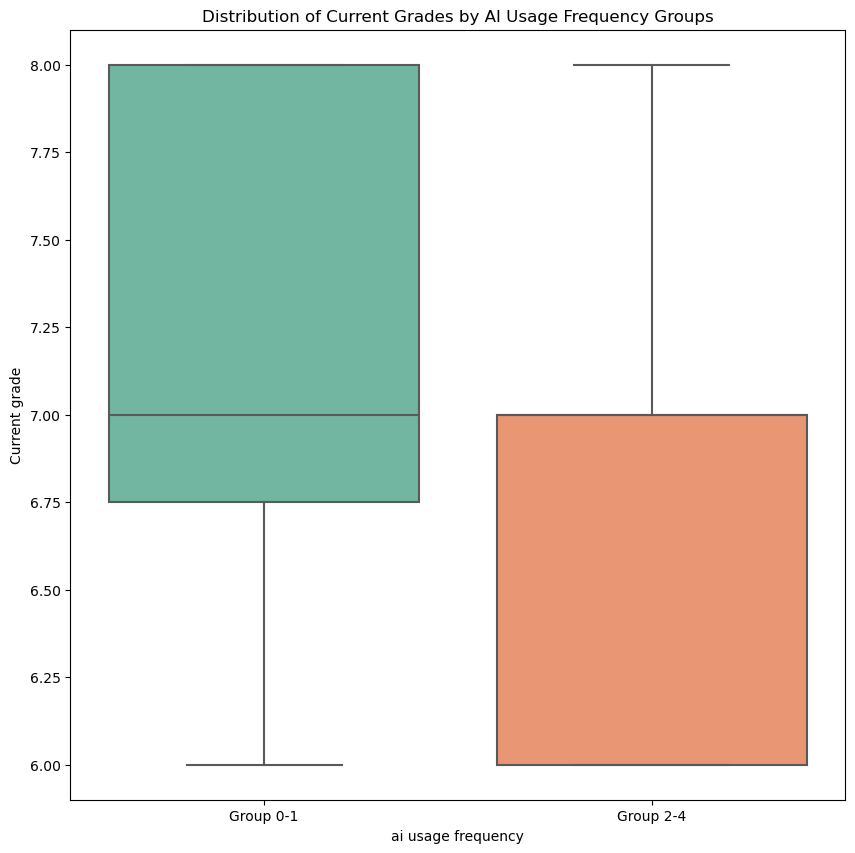

In [71]:
df['usage_group'] = df['ai_usage_frequency_numeric'].apply(
    lambda x: 'Group 0-1' if x in [0, 4, 1] else 'Group 2-4'
)

stats = df.groupby('usage_group')['current_grade'].apply(
    lambda x: pd.Series({
        'Q1 (25%)': x.quantile(0.25),
        'Median (50%)': x.median(),
        'Q3 (75%)': x.quantile(0.75),
        'IQR': x.quantile(0.75) - x.quantile(0.25),
        'Min': x.min(),
        'Max': x.max(),
        'Mean': x.mean()
    })
)

print("Statistics for Current Grade by AI Usage Frequency Groups:")
print(stats)
pd.DataFrame(stats)
plt.figure(figsize=(10,10))
sns.boxplot(x='usage_group', y='current_grade', data=df, palette='Set2')
plt.title("Distribution of Current Grades by AI Usage Frequency Groups")
plt.xlabel('ai usage frequency')
plt.ylabel('Current grade')
plt.show()

In [72]:
sample.columns

Index(['current_grade', 'ai_assistance_level'], dtype='object')

Statistics for Current Grade by AI Usage Frequency Groups:
usage_group              
1            Q1 (25%)        7.000000
             Median (50%)    7.000000
             Q3 (75%)        8.000000
             IQR             1.000000
             Min             6.000000
             Max             8.000000
             Mean            7.181818
2            Q1 (25%)        6.000000
             Median (50%)    7.000000
             Q3 (75%)        7.000000
             IQR             1.000000
             Min             6.000000
             Max             8.000000
             Mean            6.800000
Name: current_grade, dtype: float64


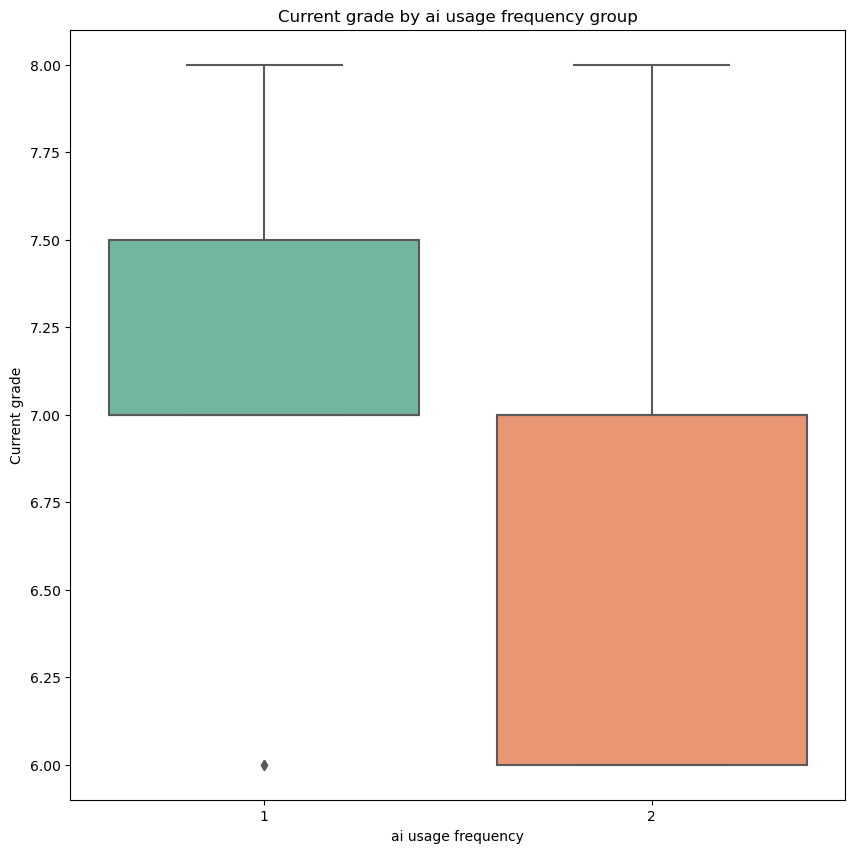

In [73]:
df['usage_group'] = df['ai_usage_frequency_numeric'].apply(
    lambda x: 1 if x in [0, 1] else 2
)

bootstrap_samples = 1000
means_boxplot = [] 

for _ in range(bootstrap_samples):
    sample = df[['current_grade', 'ai_assistance_level', 'usage_group']].sample(frac=1, replace=True)
    means.append(sample.mean())  
    
stats = df.groupby('usage_group')['current_grade'].apply(
    lambda x: pd.Series({
        'Q1 (25%)': x.quantile(0.25),
        'Median (50%)': x.median(),
        'Q3 (75%)': x.quantile(0.75),
        'IQR': x.quantile(0.75) - x.quantile(0.25),
        'Min': x.min(),
        'Max': x.max(),
        'Mean': x.mean()
    })
)

print("Statistics for Current Grade by AI Usage Frequency Groups:")
print(stats)

plt.figure(figsize=(10,10))
sns.boxplot(x='usage_group', y='current_grade', data=sample, palette='Set2')
plt.title('Current grade by ai usage frequency group')
plt.xlabel('ai usage frequency')
plt.ylabel('Current grade')
plt.show()

In [74]:
# Identify object columns (non-numeric columns)
object_columns = df.select_dtypes(include=['object']).columns

# Filter rows where "nothing" appears in any object column (case-insensitive)
df_filtered = df[~df[object_columns].apply(lambda x: x.str.lower().str.contains('nothing')).any(axis=1)]

# Perform one-hot encoding on the filtered DataFrame
df_encoded = pd.get_dummies(df_filtered, columns=df_filtered.select_dtypes(include=['object']).columns)

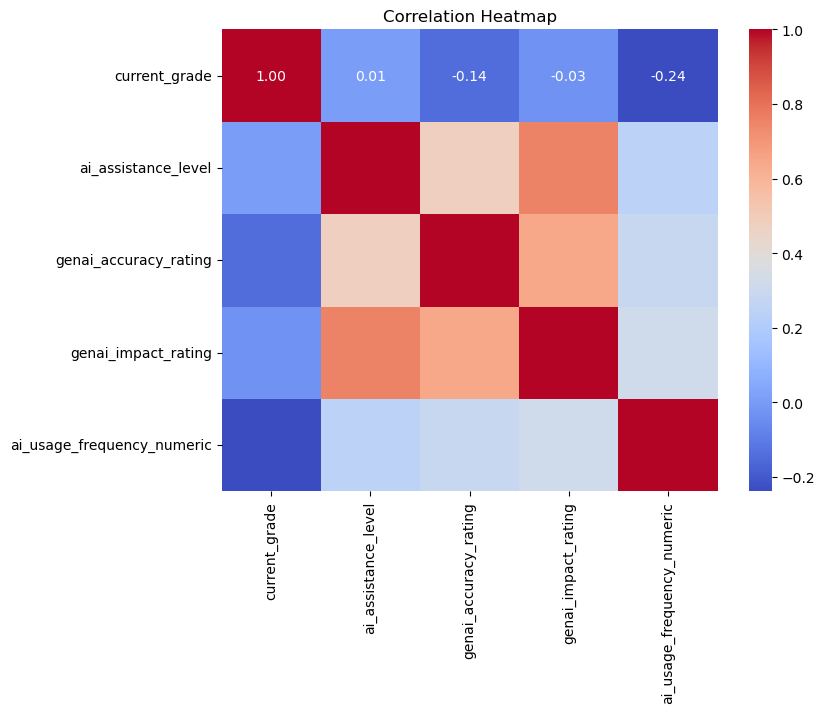

In [75]:
correlation_matrix = df[['current_grade', 'ai_assistance_level', 'genai_accuracy_rating', 'genai_impact_rating', 'ai_usage_frequency_numeric']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


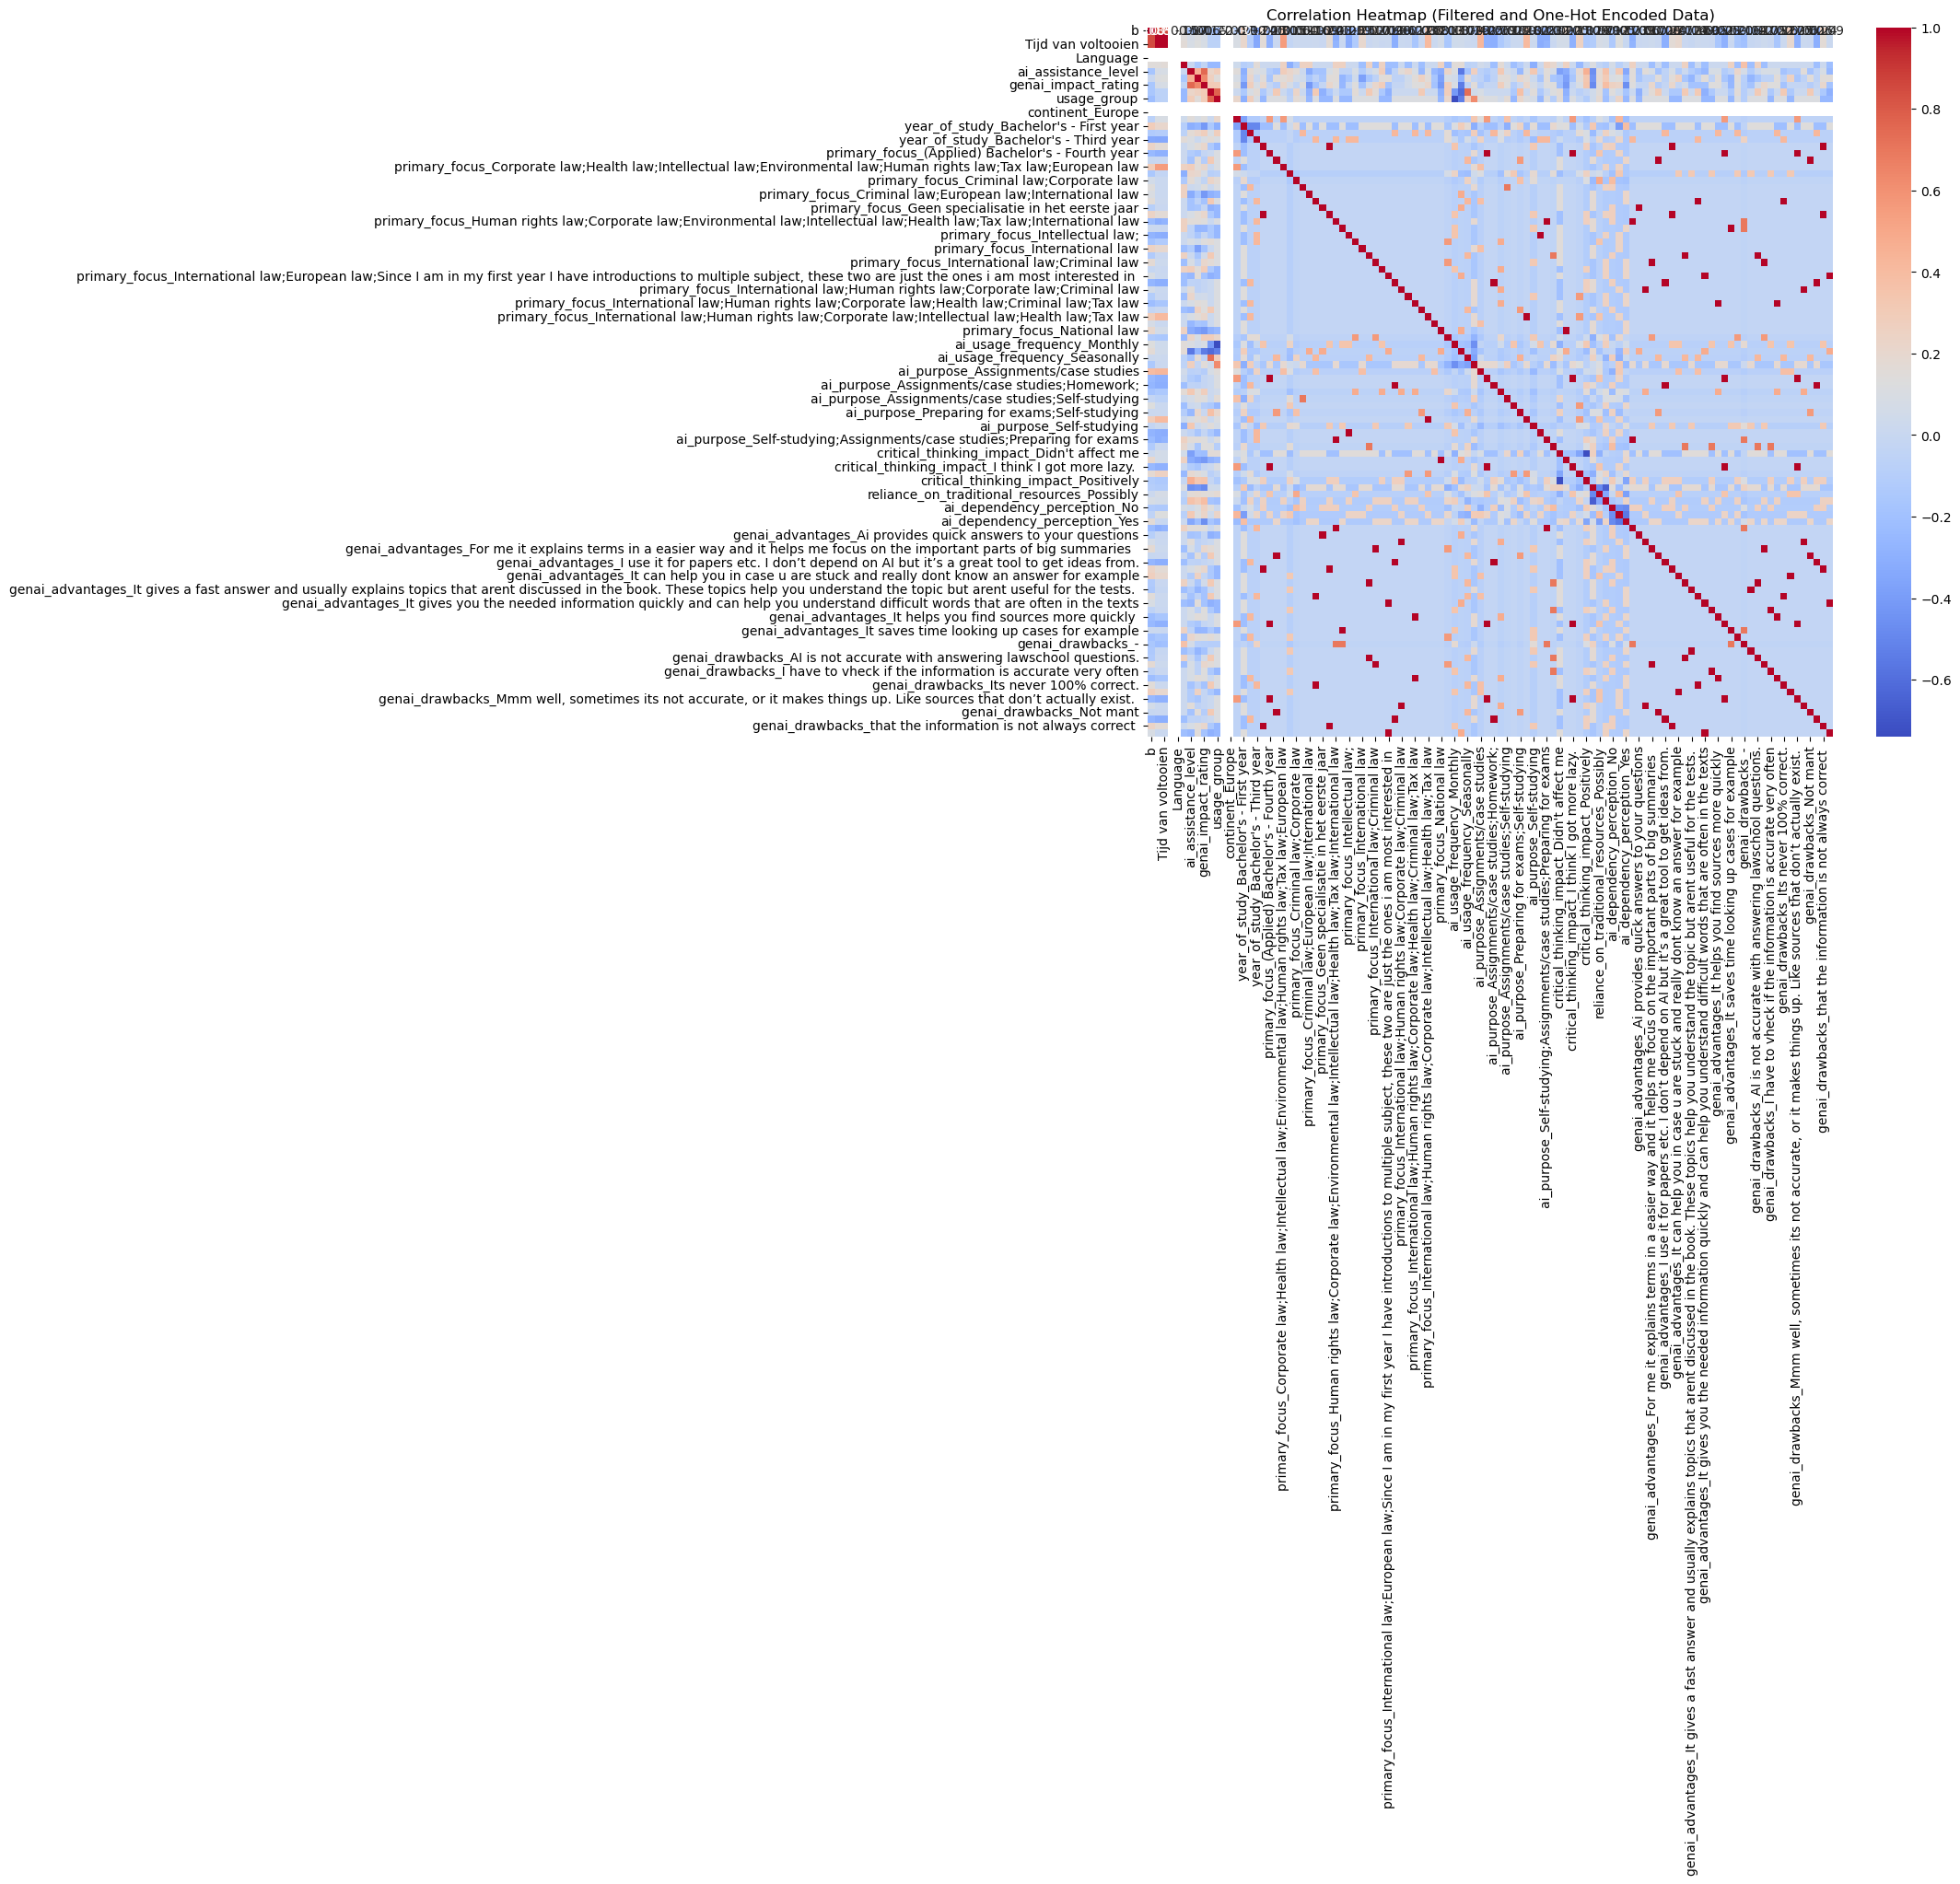

In [76]:
# Compute the correlation matrix for the encoded DataFrame
correlation_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Filtered and One-Hot Encoded Data)')
plt.show()

In [77]:
corrmat = correlation_matrix.corr()

currentgrade_corr = corrmat['current_grade'].dropna().sort_values(ascending=False)

print("Top correlations with 'current_grade':")
print(currentgrade_corr.head(20))  # Display top positive correlations
print("\nLowest correlations with 'current_grade':")
print(currentgrade_corr.tail(20))  # Display top negative correlations

Top correlations with 'current_grade':
current_grade                                                                                                           1.000000
genai_drawbacks_-                                                                                                       0.454097
genai_advantages_It saves time looking up cases for example                                                             0.347034
primary_focus_Human rights law;Corporate law;Intellectual law;Health law                                                0.347034
critical_thinking_impact_Haven’t used it                                                                                0.345558
primary_focus_National law                                                                                              0.345558
primary_focus_Criminal law;European law;International law                                                               0.325562
genai_advantages_-                                        

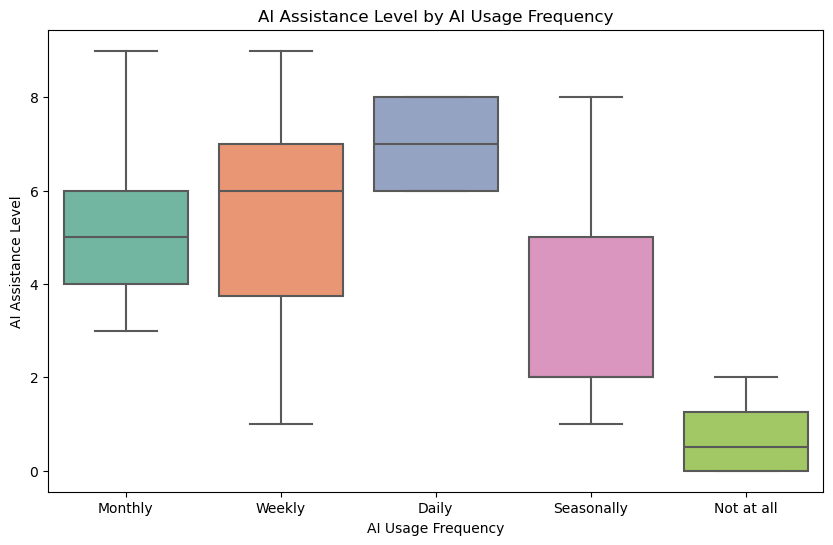

In [78]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ai_usage_frequency', y='ai_assistance_level', data=df, palette='Set2')
plt.title('AI Assistance Level by AI Usage Frequency')
plt.xlabel('AI Usage Frequency')
plt.ylabel('AI Assistance Level')
plt.show()


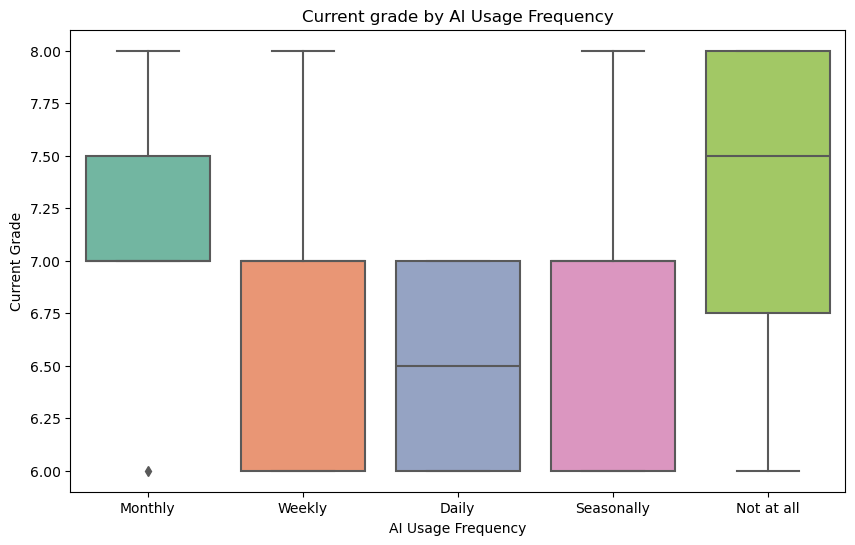

In [79]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ai_usage_frequency', y='current_grade', data=df, palette='Set2')
plt.title('Current grade by AI Usage Frequency')
plt.xlabel('AI Usage Frequency')
plt.ylabel('Current Grade')
plt.show()
